# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm

# 2. Data Loading & Splitting

In [2]:
# Load dataset
df = pd.read_csv('transistor_density.csv')
df.head()

,Year,Density
0,1968,20000
1,1971,10000
2,1974,6000
3,1977,3000
4,1981,1500


In [3]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Year,Density
0,1993,350
1,2007,45
2,1981,1500
3,2003,90
4,1971,10000


In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     25 non-null     int64
 1   Density  25 non-null     int64
dtypes: int64(2)
memory usage: 532.0 bytes


In [5]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 25
Number of columns: 2


In [6]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,Year,Density
0,1993,350
1,2007,45
2,1981,1500
3,2003,90
4,1971,10000


In [7]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 5
Number of columns: 2


In [8]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,Year,Density
5,2010,28
6,2005,65
7,2022,3
8,1999,180
9,1990,600


In [9]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 20
Number of columns: 2


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [10]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 20
Number of columns: 2


In [11]:
# # Drop unnecessary columns
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['rank'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [12]:
# # Rename columns
# headers = ["Transaction date", "House age", "Distance to the nearest MRT station",
#            "Number of convenience stores", "Latitude", "Longitude", "House price of unit area"]
# df_train.columns = headers
# df_train.columns

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 5 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     20 non-null     int64
 1   Density  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     20 non-null     int64
 1   Density  20 non-null     int64
dtypes: int64(2)
memory usage: 452.0 bytes


In [16]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [17]:
# Show non-numeric columns
print("Non-numeric columns:")
print(sorted(list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))))

Non-numeric columns:
[]


In [18]:
# Encode categorical columns
# categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

# for col in categorical_cols:
#     mapping = dict()
#     values = sorted(df_train[col].unique())

#     for i in range(len(values)):
#         mapping[values[i]] = i

#     enc_map =[{'col': col, 'mapping': mapping}]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)

# X = df_train.drop(['Sales'], axis=1)
# y = df_train['Sales']
# X = pd.get_dummies(X)
# df_train = pd.concat([X, y], axis=1)
# df_train

In [19]:
# Separate features and labels
y = df_train['Density']
X = df_train.drop(['Density'], axis=1)

<Axes: >

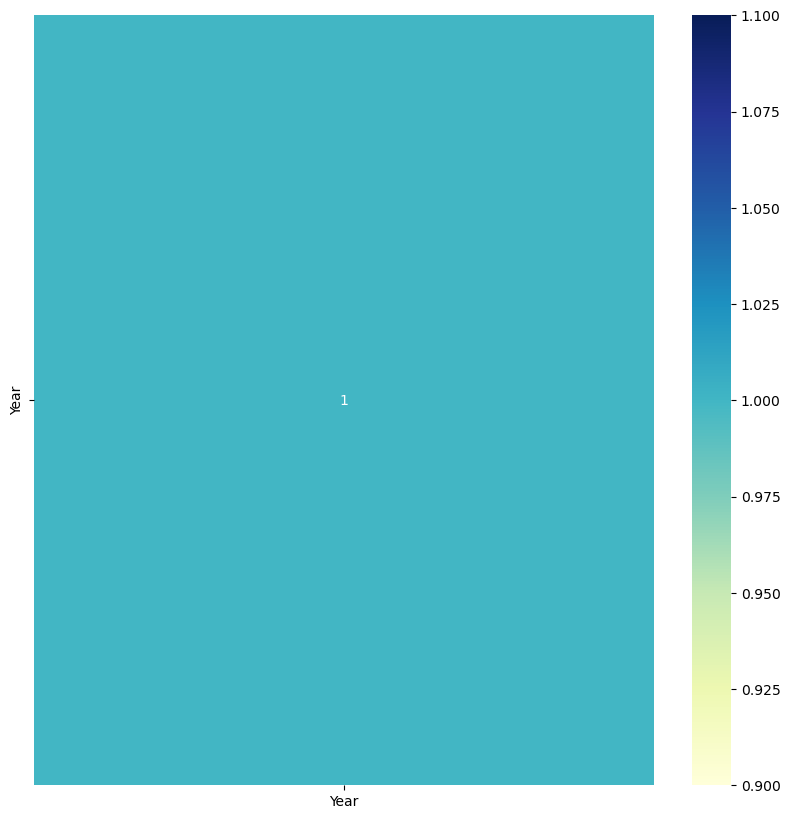

In [20]:
# Displaying heatmap
plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

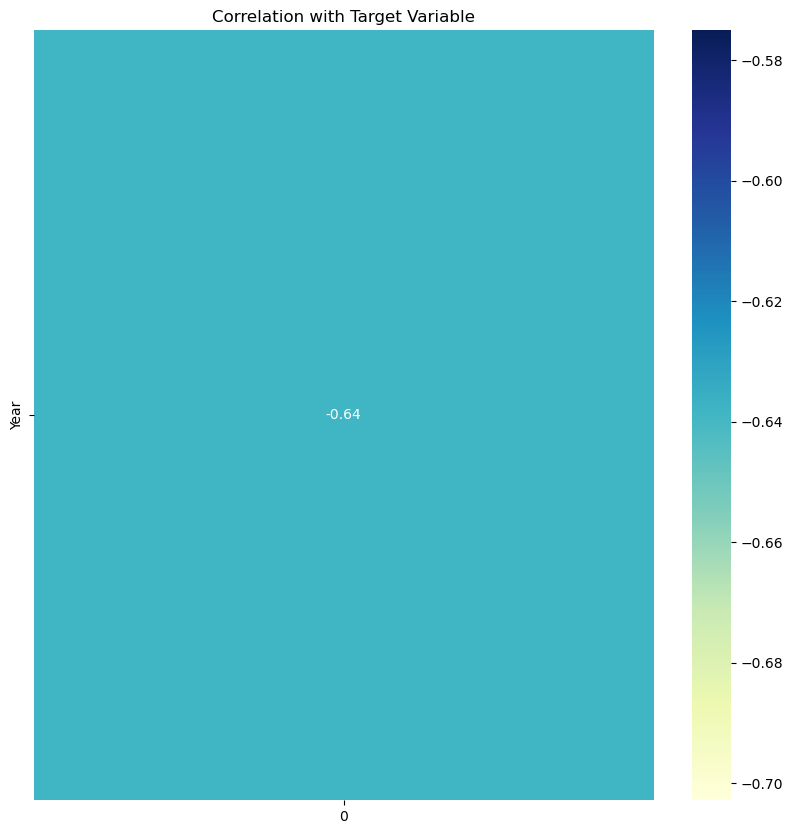

In [21]:
# Create a correlation matrix with target variable
corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [22]:
# Check for outliers in numerical columns before polynomial features
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)

In [23]:
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

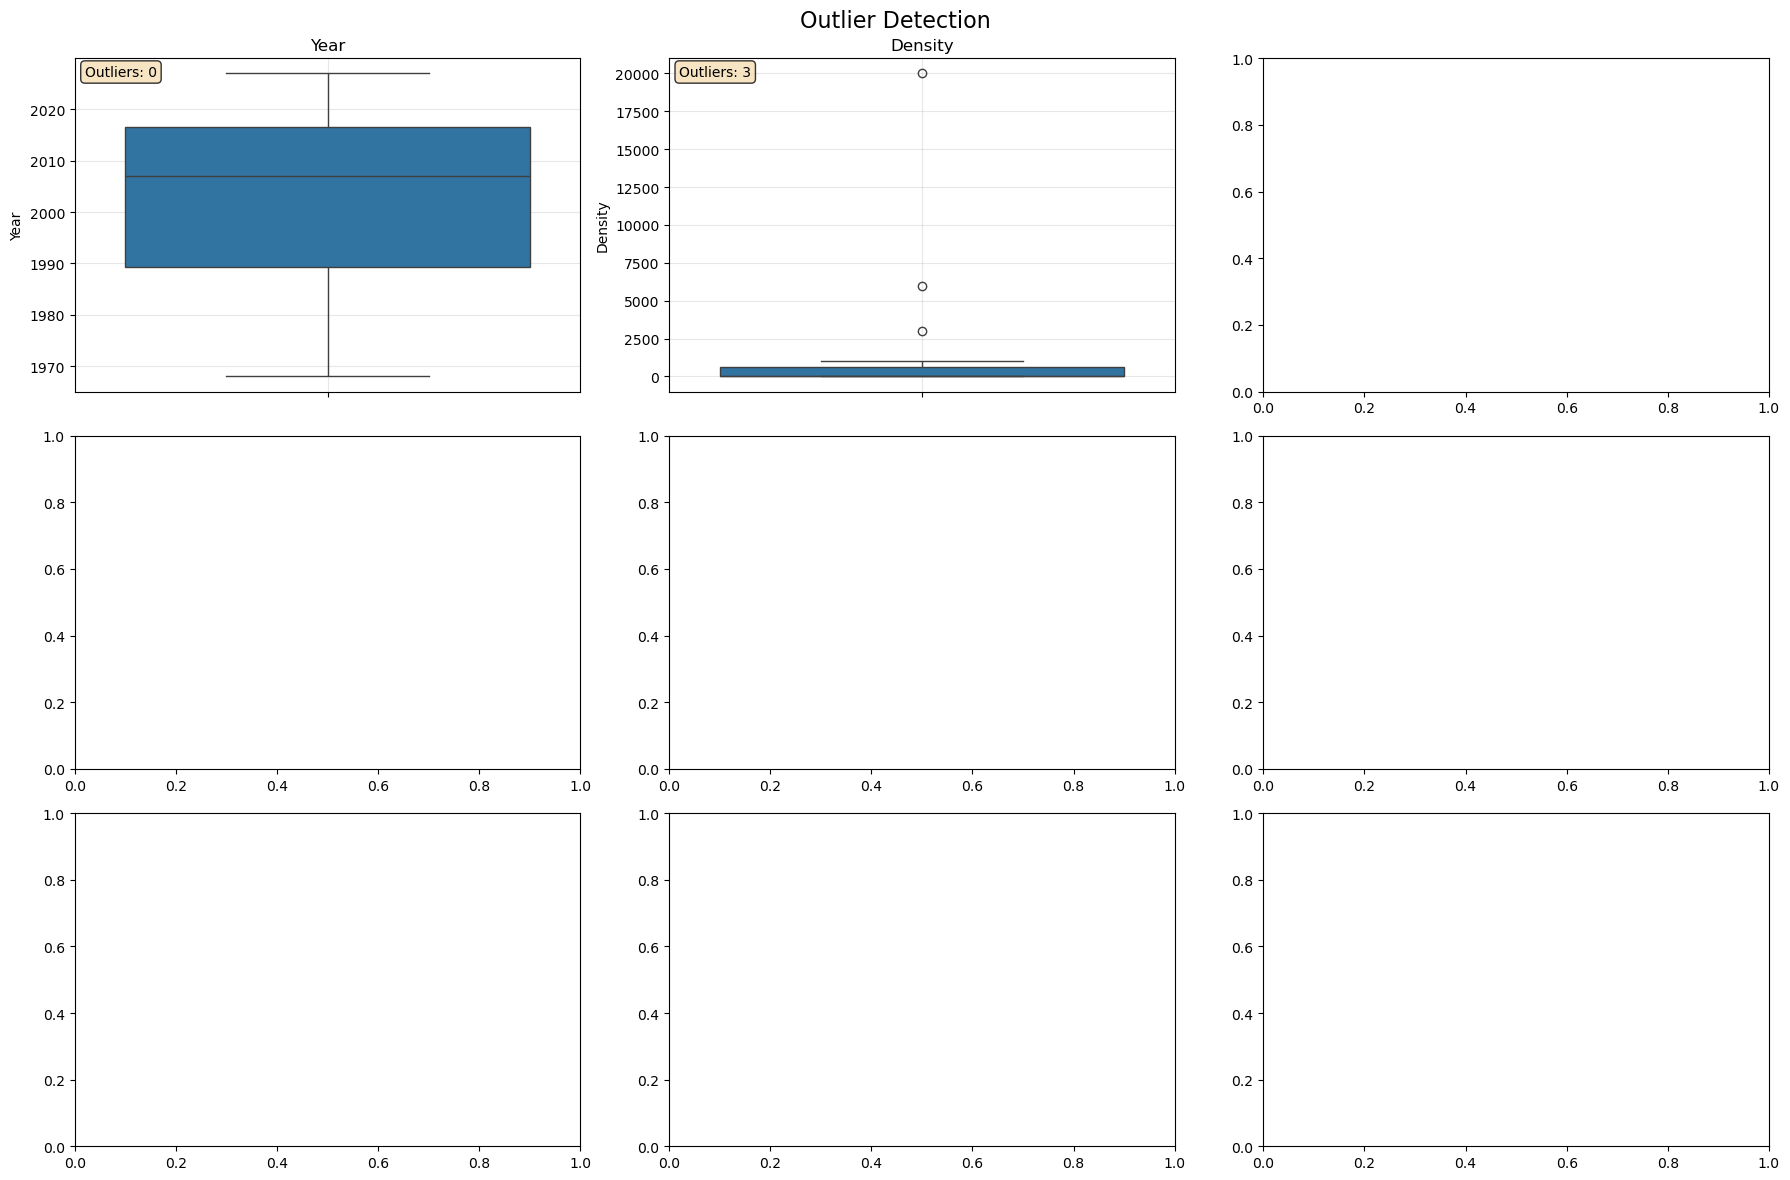

In [24]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [25]:
# # Remove outliers based on IQR method
# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)

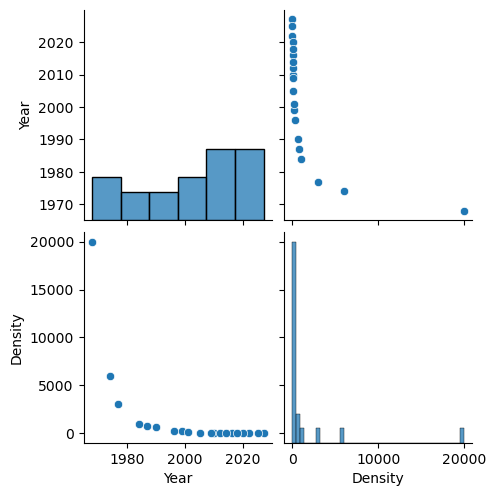

In [26]:
sns.pairplot(df_train)

In [27]:
df_train.describe()

,Year,Density
count,20.000000,20.000000
mean,2002.700000,1607.450000
std,17.755948,4562.090881
min,1968.000000,1.000000
25%,1989.250000,9.250000
50%,2007.000000,48.500000
75%,2016.500000,650.000000
max,2027.000000,20000.000000


In [28]:
# Separate features and labels
y_train = df_train['Density']
X_train = df_train.drop(['Density'], axis=1)

In [29]:
# Exponential transformation
y_train = np.log(y_train)

In [30]:
# # MinMax Scaling
# numeric_cols = X_train.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()
# scaler_Y = MinMaxScaler()

# X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
# y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# pd.DataFrame(y_train, columns=['Density'])

### 3.2 Testing Data

In [31]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 5
Number of columns: 2


In [32]:
# # Drop unnecessary columns
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['rank'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [33]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [34]:
# Check for missing values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     5 non-null      int64
 1   Density  5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [35]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     5 non-null      int64
 1   Density  5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [36]:
# Separate features and labels
y_test = df_test['Density']
X_test = df_test.drop(['Density'], axis=1)

In [37]:
# Exponential transformation
y_test = np.log(y_test)

In [38]:
# # MinMax Scaling
# numeric_cols = X_test.select_dtypes(include='number').columns

# X_test[numeric_cols] = scaler_X.transform(X_test[numeric_cols])
# y_test = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()
# pd.DataFrame(y_test, columns=['Density'])

# 4. Exponential Regression

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Evaluate the model

residual_df = None

def evaluate_model(model, X_test, y_test):    
    y_pred = model.predict(X_test)
    # y_pred = scaler_Y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    # y_test = scaler_Y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    y_test = np.exp(y_test)
    y_pred = np.exp(y_pred)
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

print("Exponential Regression")
evaluate_model(model, X_test, y_test)

Exponential Regression
MAE: 347.63611864110544
MSE: 295111.93493816943
RMSE: 543.2420592499898
R^2: 0.9799664912257887


In [41]:
residual_df

,Y_Test,Y_Pred,Residuals
0,350.0,346.650945,3.349055
1,45.0,38.554666,6.445334
2,1500.0,2277.448053,-777.448053
3,90.0,72.209718,17.790282
4,10000.0,10933.147870,-933.147870


# 5. Tuning